## Praktische Aufgaben – Blatt1

### Aufgabe 1: Daten Analysieren

Im Folgenden werden die Daten einer Audiodatei geladen. 
Diese sollen erst geplottet werden, anschließend berechnet ihr darauf verschiedene Metriken.

Dafür importieren wir zunächst einige hilfreiche Pakete: `numpy` zur Datenmanipulation, `matplotlib` zum Plotten und `scipy` zum Einlesen der Audiodatei. Ihr solltet euch ein wenig Zeit nehmen, um euch mit `numpy` und `matplotlib` vertraut zu machen, wir werden beide Bibliotheken in allen Übungsblättern nutzen.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [108]:
sampling_rate, data = wavfile.read('Audio.wav')

C:\Users\Melih\AppData\Local\Temp\ipykernel_19940\105477154.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('Audio.wav')


**1.** Plottet die Daten.

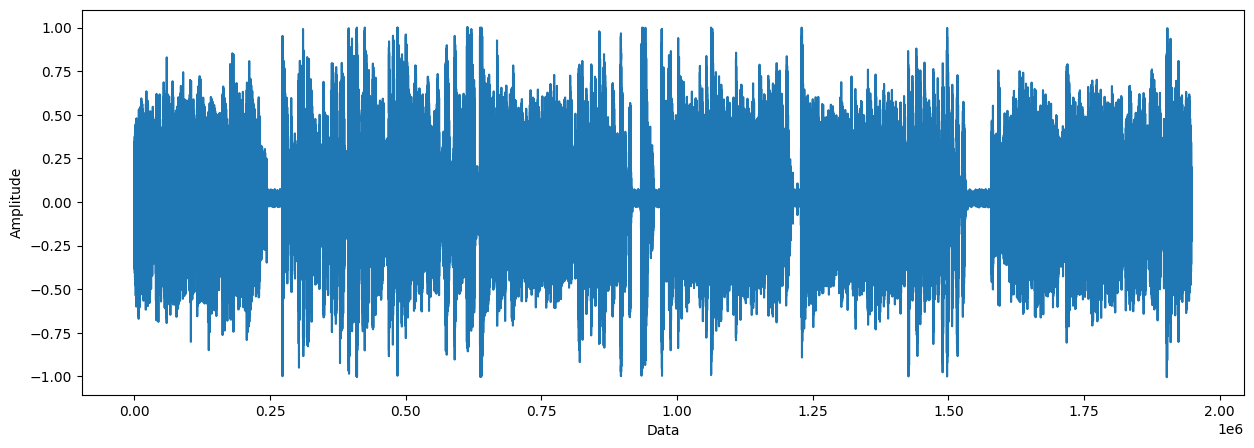

In [109]:
imageWidth = 15
plt.rcParams['figure.figsize'] = [imageWidth, 5]

# YOUR CODE HERE
plt.plot(data)
plt.xlabel('Data')
plt.ylabel('Amplitude')
plt.show()

**2.** Plottet die Daten nun noch einmal mit der x-Achse in Sekunden.

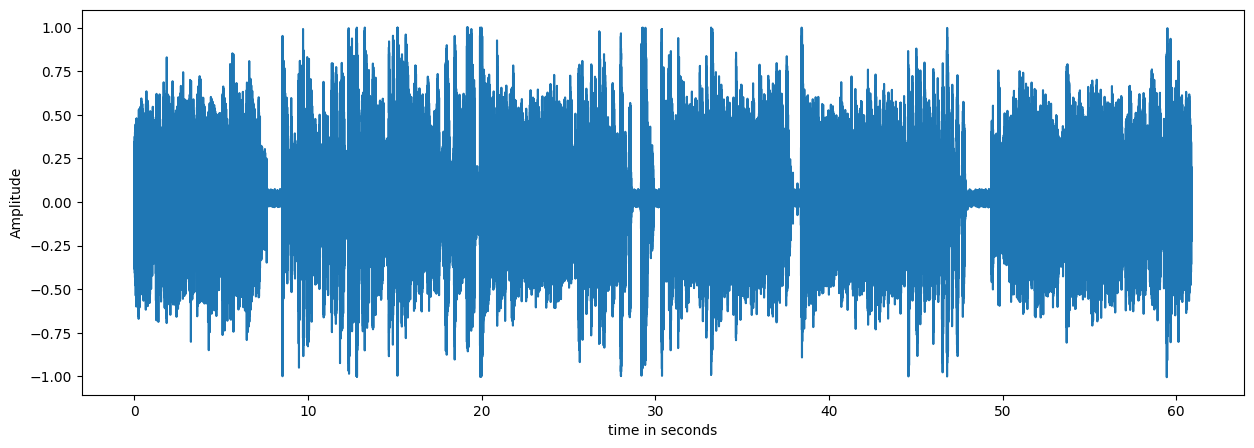

1947698


In [110]:
# YOUR CODE HERE

time = np.linspace(0, len(data) / sampling_rate, len(data))
    
plt.plot(time, data)
plt.xlabel('time in seconds')
plt.ylabel('Amplitude')  
plt.show()
print(len(data)) # a lot of samples to iterate over, maybe np.arange() / np.linspace() to make code faster but leaving it fornow

**3.** Berechnet nun die folgenden Metriken und speichert diese in den initialisierten Variablen.
- Durchschnitt
- Standardabweichung
- Quadratisches Mittel (Root Mean Square)
- Länge der Audio-Datei in Sekunden

In [111]:
mean = 0
standard_deviation = 0
rms = 0
duration = 0

# YOUR CODE HERE
mean = np.mean(data)
standard_deviation = np.std(data)
rms = np.sqrt(np.mean(np.square(data)))
duration = len(data) / sampling_rate

print(mean, standard_deviation, rms, duration)

0.0055921306 0.21845573 0.21852723 60.8655625


Eure Ergebnisse werden automatisch ausgewertet. Die Tests sehen in etwa so aus:

In [112]:
np.testing.assert_allclose(0.0055921306, mean)

### Aufgabe 2: Pausen Erkennen
**1.** In der Datei gibt es mehrere Pausen, an welcher Sekundenmarke sind diese jeweils?


Eine Pause ungefähr 7-9 Sekunden  
Zwei Pause nah aneinander bei 28-31 Sekunden  
Eine Pause ungefähr 37-39 Sekunden  
Eine Pause ungefähr 47-50 Sekunden  

**2.** Plottet eine der Pausen. Die Einheit der x-Achse ist hier nicht wichtig. Dafür ist es besonders interessant, sich die Pausen im Kontext des umgebenden Signals anzuschauen.

_Tipp_: mit `data[start:end]` könnt ihr einen Ausschnitt der Daten betrachten. 

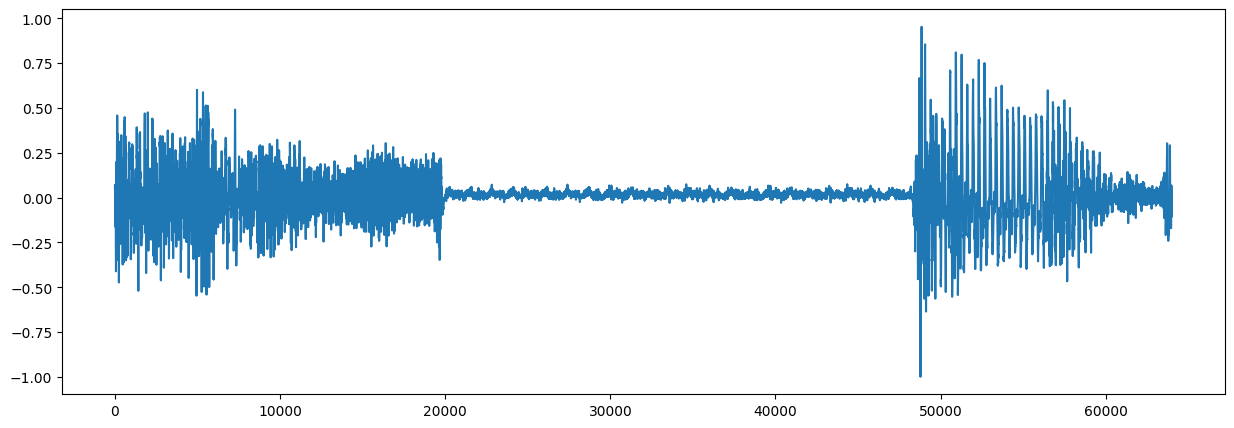

In [113]:
# YOUR CODE HERE
plt.plot(data[7*sampling_rate:9*sampling_rate])
plt.show()

**3.** Wie könnten diese Pausen automatisch erkannt werden?


Man könnte einen Schwellenwert setzen, jeweils für Lautstärke und Zeit einer minimalen Pause, und dann über die Dateisamples iterieren um diese zu finden, und das letzte Sample der Pause ausgeben. 

**4.** Implementiert eure Idee und speichert das Ende der erkannten Pausen in dem vorgegebenen Array `pauses`.
Zum Vergleich: die erste Pause endet bei ca. 273000.

In [114]:
pauses = []

# YOUR CODE HERE

# Set the threshold for detecting a pause
volume_threshold = 0.1 * np.max(data)
min_pause_length = 0.2 * sampling_rate

pause_start = 0
isPause = False

# Iterating over data samples to find pauses and appending the last sample of a pause
for n in range (len(data)):
    too_quiet = abs(data[n]) < volume_threshold
    pause_time_reached = n - pause_start > min_pause_length
    if isPause and not too_quiet:
        if pause_time_reached:
            pauses.append(n)
        isPause = False
    elif not isPause and too_quiet:
        isPause = True
        pause_start = n
        
print(pauses)

[272362, 933468, 970723, 1221858, 1578705]


**5.** Nutzt eure eben erkannten Pausen in `pauses` um das Trompetenintro inklusive der ersten Pause zu entfernen.

[-0.10105743 -0.10638515 -0.1078918  ...  0.00672369 -0.00021861
  0.00223852]


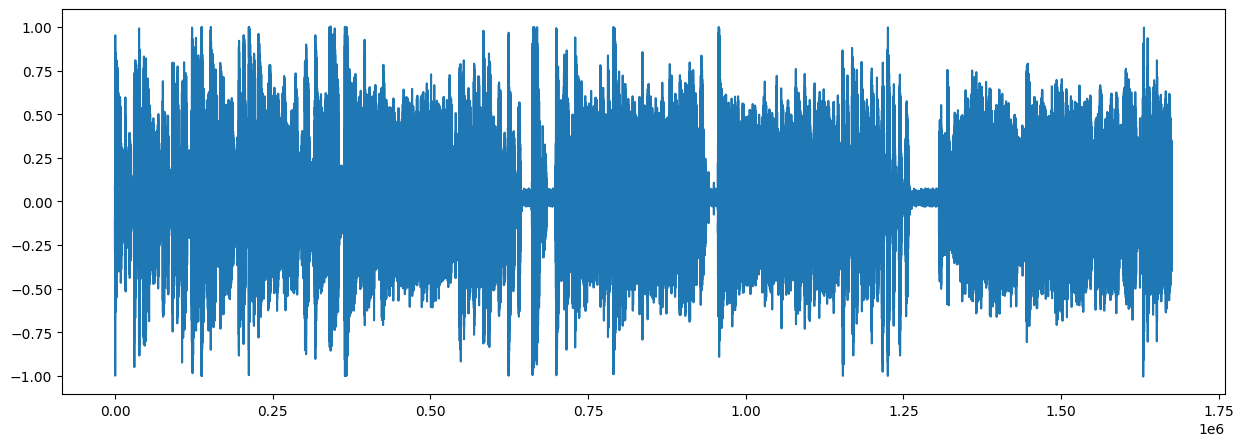

In [115]:
trimmed_data = data

# YOUR CODE HERE
index = []
for n in range (len(data)):
    if n < pauses[0]:
        index.append(n)
        
trimmed_data = np.delete(trimmed_data, index)
print(trimmed_data)
plt.plot(trimmed_data)

In [116]:
# Euer Ergebnis wird automatisch getestet.

**6.** Nehmt nun wieder das komplette Signal und verringert die Lautstärke um 10 dB.

_Tipp_: Hierfür existieren Gleichungen, mit denen Amplitude in dB und dB in Amplitude umgewandelt werden können. Euer Endergebnis sollte wieder ein Amplitudensignal sein.

In [117]:
quiet_data = data

# YOUR CODE HERE
# Calculate the amplitude scaling factor
scale_factor = 10 ** (-10 / 20)

# Multiply the audio data by the scaling factor
quiet_data *= scale_factor

In [118]:
# Euer Ergebnis wird automatisch getestet.

**7.** Plottet nun das Signal mit reduzierter Lautstärke `quiet_data`. Was fällt euch auf, wenn ihr diesen Plot mit eurem ersten Plot von oben vergleicht?

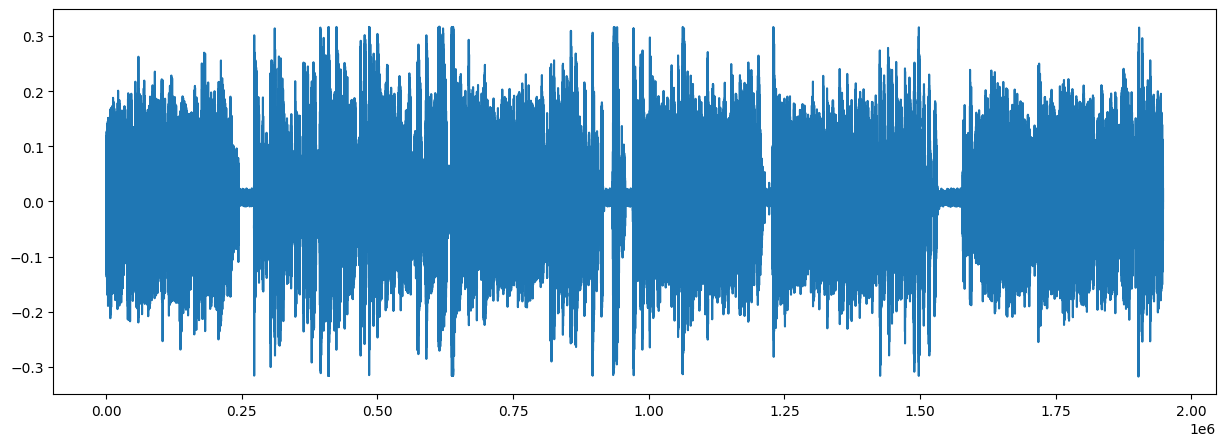

In [119]:
# YOUR CODE HERE
plt.plot(quiet_data)

Die Plots sehen im Grunde sehr ähnlich aus, nur die Werte der y-Achse verändern sich durch die Manipulation der Lautstärke.

**8.** Verdoppelt nun das Tempo des Liedes und plottet wie oben das Signal. Nutzt wieder eine x-Achse in Sekunden.
Wenn ihr möchtet, könnt ihr das neue Signal wieder als wave Datei speichern und hineinhören.

_Hinweis_: Abtastratenwandlung verändert die Audioauflösung bzw. -qualität, und ist hier nicht erwünscht.

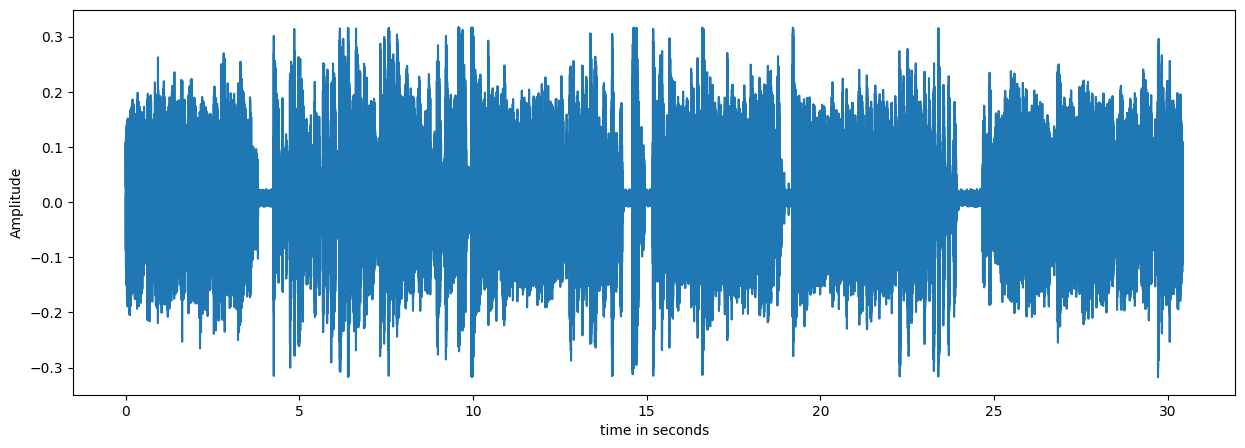

In [126]:
data_quick = data

# YOUR CODE HERE
data_quick = data[::2]
seconds = np.linspace(0, len(data_quick) / sampling_rate, len(data_quick))

plt.plot(seconds, data_quick)
plt.xlabel('time in seconds')
plt.ylabel('Amplitude')  
plt.show()
# wavfile.write ('Audio_quick.wav', sampling_rate, data_quick)